In [48]:
import numpy as np
import pandas as pd

In [49]:
data = pd.read_csv('data/dat.csv', usecols=[1, 2])

data

,x1,x2
0,1.1,6.5
1,2.1,6.5
2,2.1,5.5
3,1.1,4.5
4,2.1,3.5
5,-0.9,-2.5
6,-1.9,-4.5
7,-0.9,-5.5
8,-2.9,-6.5
9,-1.9,-7.5


In [50]:
data = data.apply(lambda col: (col - np.mean(col)) / np.std(col))

data

,x1,x2
0,0.606450,1.181818
1,1.157767,1.181818
2,1.157767,1.000000
3,0.606450,0.818182
4,1.157767,0.636364
5,-0.496186,-0.454545
6,-1.047504,-0.818182
7,-0.496186,-1.000000
8,-1.598822,-1.181818
9,-1.047504,-1.363636


In [51]:
Cov = np.cov(data.T)

Cov

array([[1.11111111, 1.04137815],
       [1.04137815, 1.11111111]])

In [52]:
eval, evec = np.linalg.eig(Cov)

ev = list(zip(eval, evec))
ev = sorted(ev, key=lambda x: x[0], reverse=True)

eval, evec = zip(*ev)

ev

[(2.1524892654599452, array([ 0.70710678, -0.70710678])),
 (0.0697329567622762, array([-0.70710678, -0.70710678]))]

In [53]:
scores = data @ evec
explained_variance = eval / np.sum(eval)

scores, explained_variance

(          0         1
 0 -0.406847 -1.264496
 1 -0.017006 -1.654337
 2  0.111558 -1.525772
 3 -0.149717 -1.007367
 4  0.368688 -1.268642
 5 -0.029444  0.672269
 6 -0.162155  1.319239
 7  0.356250  1.057963
 8 -0.294866  1.966209
 9  0.223539  1.704934,
 array([0.96862017, 0.03137983]))

In [54]:
import matplotlib.pyplot as plt

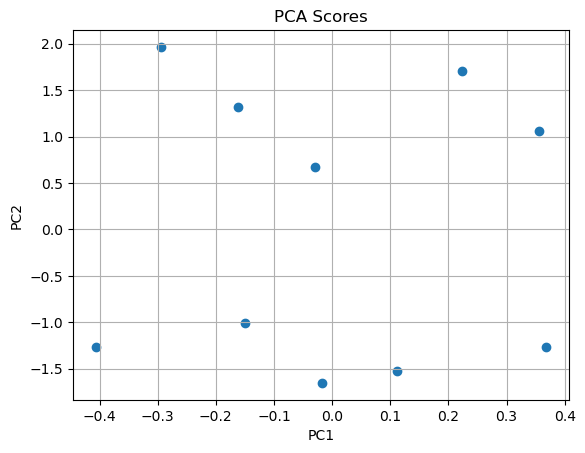

In [55]:
plt.title('PCA Scores')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)

plt.scatter(scores.iloc[:, 0], scores.iloc[:, 1])
plt.show()

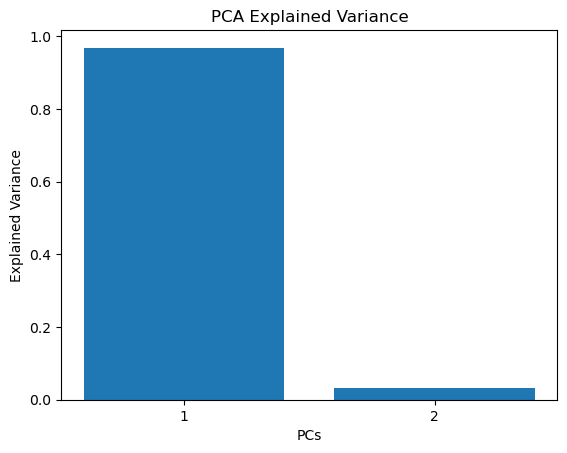

In [70]:
plt.title('PCA Explained Variance')
plt.xlabel('PCs')
plt.ylabel('Explained Variance')
plt.xticks(range(1, len(data.columns) + 1))

plt.bar(range(1, len(data.columns) + 1), explained_variance)
plt.show()